In [2]:
import transformers
import pandas
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [3]:
# tokenizer = transformers.GPT2Tokenizer.from_pretrained("gpt2")
# model = transformers.GPT2Model.from_pretrained("gpt2", return_dict=True)
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-cased")
model = transformers.BertModel.from_pretrained("bert-base-cased")

In [4]:
dt = pandas.read_csv("./cleaned/final.csv")
# dt.head()

In [5]:
d2 = dt.iloc[10:20, 0:8]
# d2.head(10)

In [6]:
sens = list(d2['combine_features'])
sens
# Pretrained word2vec
# Multivariate median
# https://sites.google.com/cs.unc.edu/lupalab
# sets
# Set embeddings
# Deep sets

['American President, The | 23.03.06 4 American Comedy Drama President, Romance The1995 aaronsorkin amazingkungfu annettebening bibliothek cleverdialogue clv cute decentflick drama dvdcollection ethics girliemovie greatcast greatperformances greatstory martinsheen michaeldouglas morals no_fa_ganes politics president robreiner romance screenwriter:aaronsorkin seen seenmorethanonce singleparents uspresident whitehouse',
 'Dracula: Dead and Loving It | 3 Comedy Dead Dracula: Horror It1995 Loving and bd-r boring gothic leslienielsen melbrooks spoof vampire',
 'Balto | 3 Adventure Animation Balto1995 Children animated dogs dogsled eimuista itaege simonwells sleddogs sortofboring talkinganimals wolves',
 "Nixon | 3 5 Drama Nixon1995 anthonyhopkins basedonatruestory biographical biography biopic characterbasedonrealperson:richardnixon cinematographer:robertrichardson clv corruption drama historicalopinion oliverstone own politicaldrama politics president truestory tumey'svhs uspresident woooh

In [7]:
tokenizer.pad_token = tokenizer.eos_token

tokenizer.add_special_tokens({'pad_token': '[PAD]'})

enc = tokenizer(sens, padding=True, return_tensors="pt")

Using eos_token, but it is not set yet.


In [8]:
enc

{'input_ids': tensor([[  101,  1237,  1697,  ...,     0,     0,     0],
        [  101, 20128,   131,  ...,     0,     0,     0],
        [  101, 18757,  6066,  ...,     0,     0,     0],
        ...,
        [  101,  3396,  7043,  ...,     0,     0,     0],
        [  101, 12860, 23361,  ...,     0,     0,     0],
        [  101,  8948,  9791,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

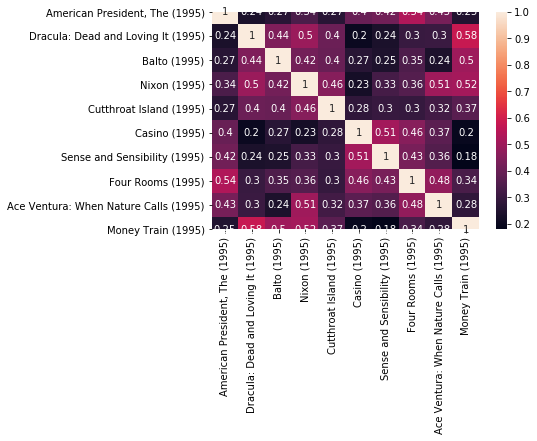

In [9]:
sns.heatmap(cosine_similarity(enc['input_ids']), annot=True, xticklabels=d2['title'], yticklabels=d2['title'])

In [10]:
d2

,movieId,title,genres,mtitle,time,rating,keywords,combine_features
10,11,"American President, The (1995)",Comedy Drama Romance,"American President, The",1995,4.0,aaronsorkin cleverdialogue cute girliemovie gr...,"American President, The | 23.03.06 4 American ..."
11,12,Dracula: Dead and Loving It (1995),Comedy Horror,Dracula: Dead and Loving It,1995,3.0,bd-r leslienielsen boring melbrooks spoof lesl...,Dracula: Dead and Loving It | 3 Comedy Dead Dr...
12,13,Balto (1995),Adventure Animation Children,Balto,1995,3.0,itaege wolves animated dogs sleddogs talkingan...,Balto | 3 Adventure Animation Balto1995 Childr...
13,14,Nixon (1995),Drama,Nixon,1995,3.0,president historicalopinion oliverstone corrup...,Nixon | 3 5 Drama Nixon1995 anthonyhopkins bas...
14,15,Cutthroat Island (1995),Action Adventure Romance,Cutthroat Island,1995,3.0,pirate pirates bigbudget clv pirate treasure t...,Cutthroat Island | 3 Action Adventure Cutthroa...
15,16,Casino (1995),Crime Drama,Casino,1995,4.0,etaege robertdeniro characterdevelopment viole...,Casino | 20060407 4 Casino1995 Crime Drama bas...
16,17,Sense and Sensibility (1995),Drama Romance,Sense and Sensibility,1995,4.0,janeausten basedonabook classicliterature fast...,Sense and Sensibility | 18thcentury 19thcentur...
17,18,Four Rooms (1995),Comedy,Four Rooms,1995,3.0,darkcomedy hotel multiplestorylines comedy hot...,Four Rooms | 3 4 Comedy Four Rooms1995 alexand...
18,19,Ace Ventura: When Nature Calls (1995),Comedy,Ace Ventura: When Nature Calls,1995,3.0,crazy jimcarrey detective detective comedy hil...,Ace Ventura: When Nature Calls | 3 Ace Calls19...
19,20,Money Train (1995),Action Comedy Crime Drama Thriller,Money Train,1995,3.0,worthwhile clv money lopez lame afternoonsecti...,Money Train | 3 Action Comedy Crime Drama Mone...


In [22]:
from datetime import datetime
start = datetime.now()

out = model(enc['input_ids'], attention_mask = enc['attention_mask'], return_dict=True)
end = datetime.now()
end - start

datetime.timedelta(seconds=2, microseconds=768832)

In [24]:
# out['last_hidden_state']

In [25]:
lhs = out['last_hidden_state'].detach().numpy()
# lhs = out[0].detach().numpy()

In [26]:
sims = [[0 for i in range(len(sens))] for i in range(len(sens))]

In [27]:
def mtx_similar3(arr1, arr2) ->float:
    '''
    From CS231n: There are many ways to decide whether
    two matrices are similar; one of the simplest is the Frobenius norm. In case
    you haven't seen it before, the Frobenius norm of two matrices is the square
    root of the squared sum of differences of all elements; in other words, reshape
    the matrices into vectors and compute the Euclidean distance between them.
    difference = np.linalg.norm(dists - dists_one, ord='fro')
    :param arr1:矩阵1
    :param arr2:矩阵2
    :return:相似度（0~1之间）
    '''
    if arr1.shape != arr2.shape:
        minx = min(arr1.shape[0],arr2.shape[0])
        miny = min(arr1.shape[1],arr2.shape[1])
        differ = arr1[:minx,:miny] - arr2[:minx,:miny]
    else:
        differ = arr1 - arr2
    dist = np.linalg.norm(differ)
    len1 = np.linalg.norm(arr1)
    len2 = np.linalg.norm(arr2)     # 普通模长
    denom = (len1 + len2) / 2
    similar = 1 - (dist / denom)
    return similar

In [28]:
for i in range(len(lhs)):
    for j in range(len(lhs)):
        sims[i][j] = mtx_similar3(lhs[i], lhs[j])

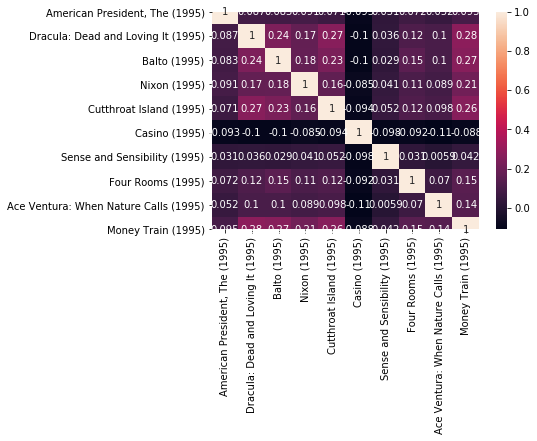

In [29]:
sns.heatmap(sims, annot=True, xticklabels = d2['title'], yticklabels=d2['title'])

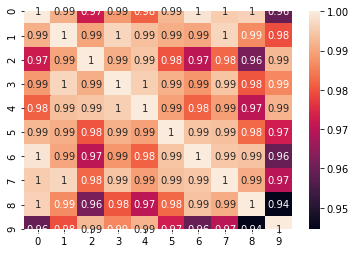

In [31]:
lhs2 = out["pooler_output"].detach()
sim2 = cosine_similarity(lhs2)
sns.heatmap(sim2, annot=True)

In [92]:
dist = np.linalg.norm(diff)

In [94]:
mtx_similar3(l1, l2)

0.6837545018214151

In [32]:
model

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0): Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (1): Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): MLP(
        (c_fc): Conv1D

In [8]:
len(dt.title.unique())

34185